# Defining cell type by their molecular features
### Single-cell transcriptomics for neuron classification
In the previous tutorial we have looked at how electrophysiological and morphological features can be used to define cell types in the brain. However, given that physiological properties can take many different forms under different conditions, it is challenging to scale up the electrophysiological approach as a primary way to define cell types. On the other hand,  molecular approaches are more suitable for the task. 

One of the molecular approaches widely used for generating cell type taxonomies task is single-cell transcriptomics (scRNA-seq), which involves profiling of the RNA transcripts within each cell, and classifying cells together if they share similar expression of RNA transcripts. 

A variety of single-cell transcriptomic studies on different regions of the mouse brain have been published, from the Allen Institute for Brain Science:
- [Adult mouse cortical cell taxonomy revealed by single cell transcriptomics (Tasic et al. 2016)](https://www.nature.com/articles/nn.4216)
- [Shared and distinct transcriptomic cell types across neocortical areas (Tasic et al. 2018)](http://www.nature.com/articles/s41586-018-0654-5)
- [A taxonomy of transcriptomic cell types across the isocortex and hippocampal formation (Yao et al. 2021)](https://linkinghub.elsevier.com/retrieve/pii/S0092867421005018)

### Patch-seq allows for the collection of transcriptomic and electrophysiological features for the same cells
Patch-seq is an experimental technique that allows for the collection of transcriptomic and electrophysiological features simultaneously. After patch-clamp recording are obtained, the cellular content of the cell can be extracted and fragments of mRNA can be sequenced and quantified. This technique enables one to directly relate the transcriptomic features of a given neuron to other identifying characteristics of the same neuron.

For the purpose of this tutorial, we will use the Patch-deq dataset generated from mouse primary visual cortex, the methodologies for data generation are detailed in this paper: [Integrated Morphoelectric and Transcriptomic Classification of Cortical GABAergic Cells](https://linkinghub.elsevier.com/retrieve/pii/S009286742031254X).

### Tutorial steps
1. Import common packages
2. Step 2. Obtaining count matrix for the Patch-seq dataset


## Step 1. Import common packages

In [2]:
# You have installed these packages in the previous tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# These packages are part of the Python Standard Library, you don't need to install them necause they come with Python
import urllib.request
import tarfile
import io
import json

## Step 2. Obtaining count matrix for the Patch-seq dataset
### Single-cell transcriptomic data are usually presented in the form of count matrices
One of the advantages of using scRNA-seq data for neuron classification is that the data are usually presented as matrices, known as a count matrix, where each row represents one gene and each column represents one cell. Therefore, each entry in the count matrix would store the expression level of one gene in one cell. 

An example of a count matrix is the [Transcriptomic Explorer](https://celltypes.brain-map.org/rnaseq/mouse_ctx-hpf_10x?selectedVisualization=Heatmap&colorByFeature=Cell+Type&colorByFeatureValue=Gad1), which is an interactive web interface that provides you with access to the transcriptomic datasets generated by Allen Institute for Brain Science. You can select the dataset that you want to look at. 

However, this web interface only provides you with access to the count matrices generated from snRNA-seq datasets. For the Patch-seq dataset, we can download the count matrix in the form of a comma-separated values (csv) file. 
### Download count matrix for Patch-seq dataset from NeMO

Run the code cell below to download the count matrix from [The Neuroscience Multi-omic Archive (NeMO)](https://nemoarchive.org/). This step might take a few minutes, depending on your internet connectivity.

In [5]:
url = \
"https://data.nemoarchive.org/other/AIBS/AIBS_patchseq/transcriptome/scell/SMARTseq/processed/analysis/20200611/20200513_Mouse_PatchSeq_Release_count.v2.csv.tar"
response = urllib.request.urlopen(url)
tar_file = io.BytesIO(response.read())

Since the count matrix was deposited on NeMO as a tar file, we need to extract the csv file from the tar file using the `tarfile` package available as a part of the Python Standard Library, and then read the csv file into a Pandas DataFrame object

In [6]:
with tarfile.open(fileobj=tar_file) as tar:
    csv_file = tar.extractfile(tar.getmembers()[0])
count_matrix = pd.read_csv(io.StringIO(csv_file.read().decode('utf-8')))
count_matrix.set_index("Unnamed: 0", inplace = True)

In [7]:
# Check the first 5 rows of the count matrix
count_matrix.head()

,PS0810_E1-50_S88,PS0817_E1-50_S19,PS0817_E1-50_S25,PS0817_E1-50_S26,PS0817_E1-50_S27,PS0817_E1-50_S28,PS0817_E1-50_S46,PS0817_E1-50_S52,PS0830_E1-50_S17,PS0830_E1-50_S19,...,SM-J39ZH_S561_E1-50,SM-J39ZH_S562_E1-50,SM-J39ZH_S565_E1-50,SM-J39ZH_S566_E1-50,SM-J39ZH_S571_E1-50,SM-J39ZH_S576_E1-50,SM-J3A1L_S592_E1-50,SM-J3A1L_S593_E1-50,SM-J3A1L_S603_E1-50,SM-J3A1L_S604_E1-50
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610006L08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,81,51,35,0,0,483,89,...,0,0,14,0,14,0,20,38,4,56
0610009B22Rik,0,0,41,0,0,0,0,25,0,64,...,21,0,12,13,23,38,0,0,0,54
0610009E02Rik,0,0,0,0,0,1,11,0,0,0,...,0,0,9,0,1,0,0,13,0,50


In [8]:
print(f"There are {count_matrix.shape[1]} cells and {count_matrix.shape[0]} genes in the count matrix.")

There are 4435 cells and 45768 genes in the count matrix.


The intrinsic electrophysiological properties of a neuron are determined by a number of factors, including the subunit composition and quantity of voltage-sensitive ion channels such as potassium and sodium channels. For the rest of the tutorial, we will focus on genes that code for voltage-gated ion channels.

In [9]:
# Subsetting for genes that code for voltage-gated ion channels
with open("/Users/xunuo/projects/leafcutter/data/IC_list.json", "r") as f:
    IC_list = json.load(f)
count_matrix = count_matrix.loc[count_matrix.index.isin(IC_list["VGIC"])]

# Remove genes that are not expressed in any cells
count_matrix = count_matrix[count_matrix.sum(axis = 1) != 0]

### Normalizing gene counts CPM

The `count_matrix` DataFrame contains the raw read counts. It cannot be used to compare gene expression levels between cells due to the need to account for differences in gene length, total number of reads per samples, and sequencing biases. One common way to normalize gene expression levels is to calculate counts per million (CPM), which is obtained by dividing read counts for genes by the total number of reads in that cell and multiplying the results by a million, respectively. 

In [10]:
# Import precomputed library sizes for each cell, each row contains the library size for one cell
lib_size = pd.read_csv(
    "../data/lib_size.csv", 
    sep = "\t", index_col = 0)

# Remove cells that contain 0 reads or NA values
lib_size = lib_size.dropna() \
    .loc[lib_size.library_size != 0]

# Remove the cells that have been removed in the previous step from lib_size
count_matrix = count_matrix.loc[:, count_matrix.columns.isin(lib_size.index)]

><b>Task:</b> Calculating counts per million for `count_matrix`, using library sizes provided in `lib_size`

In [11]:
cpm = count_matrix.apply(lambda x: x/lib_size.library_size * 1e6, axis = 1)

## Step 3. Plotting expression levels of ion channel genes

In [12]:
# You can put in any ion channel gene you are interested in here
gene_list = ["Cacna1a", "Cacna1b", "Cacna1c", "Cacna1d"]

Text(0, 0.5, 'Counts per million (CPM)')

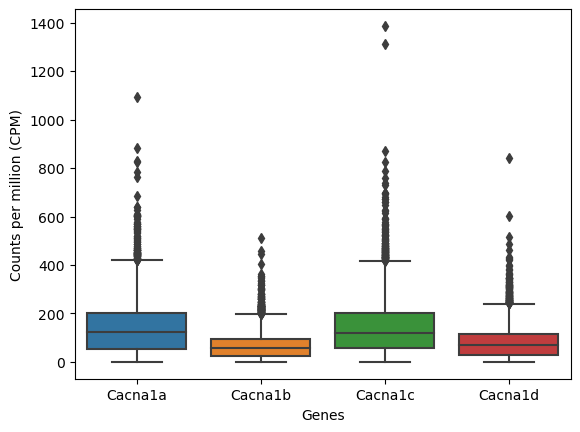

In [13]:
cpm \
    .loc[gene_list] \
    .reset_index() \
    .melt(id_vars = "Unnamed: 0") \
    .pipe((sns.boxplot, "data"), x = "Unnamed: 0", y = "value")
plt.xlabel('Genes')
plt.ylabel('Counts per million (CPM)')

## Step 4. Label each cell with the cell type it is assigned to

To obtain cell type labels (as defined in the original paper) for each cell in `cpm`, we first need to convert the `transcriptomics_sample_id` for each column in `cpm` to `cell_specimen_id`. This is because the mapping from each cell to the cell type it is assigned to is stored in a csv file where each row (represents one cell) is identified by  `cell_specimen_id` only. 

This step is also necessary for correlating transcriptomic signatures with electrophysiological data, because electrophysiological data are provided in another csv file where `cell_specimen_id` is the only identifier for each cell. After this conversion step we can merge transcriptomic and electrophysiological data based on this shared label:  `cell_specimen_id`.

In [14]:
# From the metadata file downloaded from the Allen Institute website, we can obtain a mapping from transcriptomics_sample_id to cell_specimen_id
metadata = \
    pd.read_csv("../data/20200625_patchseq_metadata_mouse.csv", usecols = ["cell_specimen_id",  "transcriptomics_sample_id"])\
    .set_index("transcriptomics_sample_id")\
    .to_dict()["cell_specimen_id"]

# Convert the column names of cpm from transcriptomics_sample_id to cell_specimen_id
cpm = cpm.rename(columns = metadata)    

In [15]:
# Obtain mapping from cell_specimen_id to T type sub-class
ID_to_subclass = pd.read_csv(
    "../data/SpecimenMetadata.csv", 
    usecols=["Specimen ID", "T type sub-class"], index_col=0) \
    .assign(subclass = lambda x: x["T type sub-class"].str.removesuffix(" interneuron")) \
    .to_dict()["subclass"]

<Axes: xlabel='subclass', ylabel='Cacna1a'>

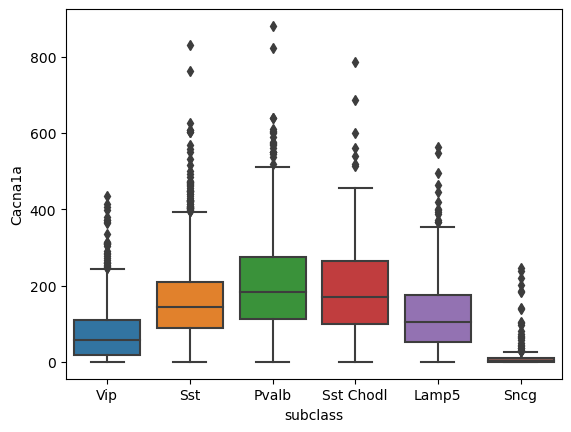

In [16]:
# Plotting the expression of Cacna1a in different subclasses
cpm.T.assign(subclass = lambda x: x.index.map(ID_to_subclass))[["Cacna1a", "subclass"]] \
    .pipe((sns.boxplot, "data"), x = "subclass", y = "Cacna1a")

## Step 5. Import extracted electrophysiological features

In [17]:
column_list = ['Specimen ID', 'Avg ISI', 'Fast trough V (long square) (millivolts)', 'Trough V (long square) (millivolts)', 'Peak V (long square) (millivolts)', 'Peak V (short square) (millivolts)',\
                   'Upstroke/downstroke ratio (long square)', 'Threshold V (long square) (millivolts)', 'F I curve slope', 'sag', 'tau', 'Vrest (millivolts)']
ephys_data = pd.read_csv(
    "../data/SpecimenMetadata.csv", 
    usecols=column_list, index_col=0)

# drop columns that contain any NA
ephys_data = ephys_data.dropna(axis = 1, how = "any")

# Standardize the electrophysiology features by calculating z-scores
ephys_data = (ephys_data - ephys_data.apply(np.mean)) / ephys_data.apply(np.std)

<Axes: xlabel='subclass', ylabel='F I curve slope'>

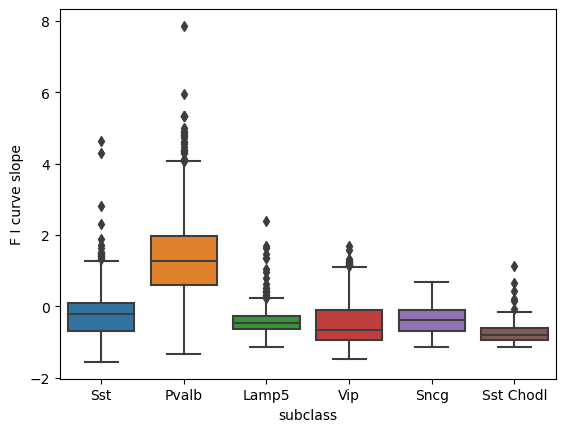

In [18]:
ephys_data \
    .assign(subclass = lambda x: x.index.map(ID_to_subclass)) \
    .pipe((sns.boxplot, "data"), x = "subclass", y = "F I curve slope")

## Step 6. Constructing Gene-ephys Correlation Matrix

To construct a matrix where each entry is the Pearson's correlation coefficient between one electrophysiological property and expression level of one gene, we need to make sure that exactly the same cells are present in both DataFrames and they are in the same order.

In [19]:
common_IDs = np.intersect1d(ephys_data.index, cpm.columns)
ephys_data = ephys_data.loc[common_IDs]
cpm = cpm.T.reindex(ephys_data.index)


In [20]:
# Calculating the correlation matrix between the expression of ion channel genes and electrophysiology features
corr_matrix = np.corrcoef(
    np.hstack([cpm.to_numpy(), ephys_data.to_numpy()]), rowvar=False)\
        [:cpm.shape[1], -ephys_data.shape[1]:]

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'F I curve slope'),
  Text(1.5, 0, 'Peak V (long square) (millivolts)'),
  Text(2.5, 0, 'Peak V (short square) (millivolts)'),
  Text(3.5, 0, 'sag'),
  Text(4.5, 0, 'Threshold V (long square) (millivolts)'),
  Text(5.5, 0, 'Trough V (long square) (millivolts)'),
  Text(6.5, 0, 'Upstroke/downstroke ratio (long square)'),
  Text(7.5, 0, 'Vrest (millivolts)')])

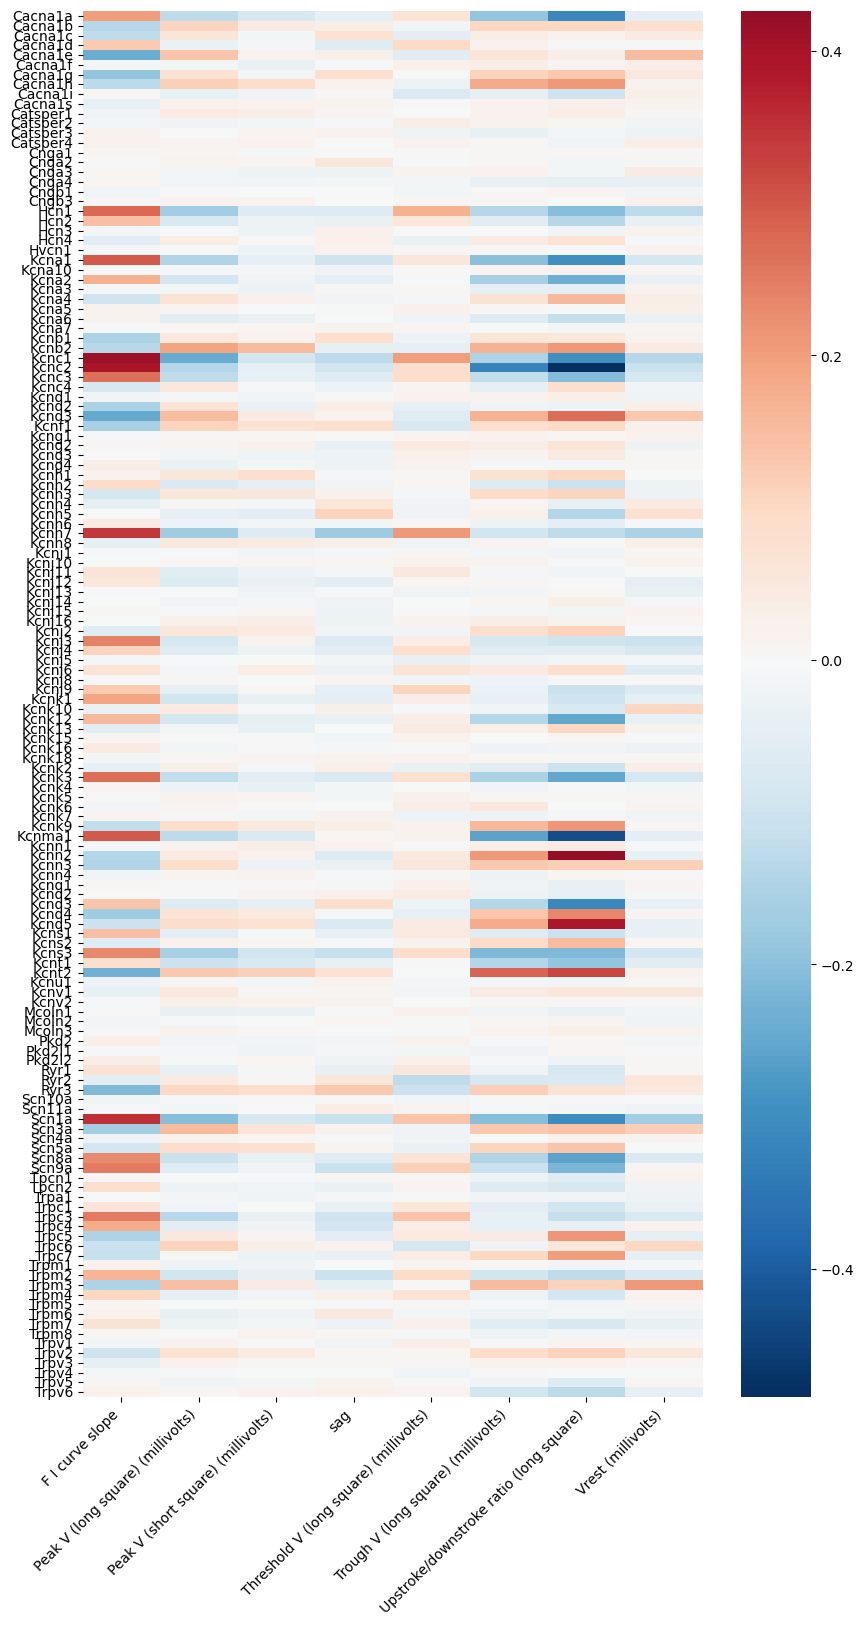

In [21]:
fig, ax = plt.subplots(figsize = (10, 18))
sns.heatmap(
    corr_matrix, cmap = "RdBu_r", center = 0,
    xticklabels = ephys_data.columns,
    yticklabels = cpm.columns
    )

# rotate the xticklabels by 90 degrees
plt.xticks(rotation=45, ha='right')

We can take a look at a specific correlation, between the expression of Kcnc1, which codes for the Potassium voltage-gated channel subfamily C member 1, and F I curve slope, which is the slope of frequency response of the cell versus stimulus intensity

Text(0, 0.5, 'F I curve slope (z-score)')

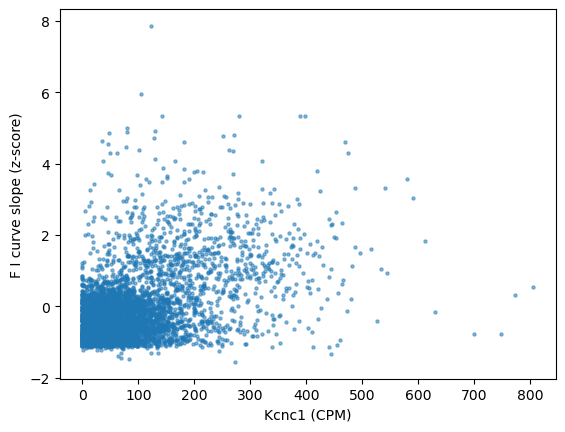

In [22]:
plt.scatter(cpm["Kcnc1"], ephys_data["F I curve slope"], alpha = 0.5, s = 5)
plt.xlabel("Kcnc1 (CPM)")
plt.ylabel("F I curve slope (z-score)")